In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('scripts/symbolic_out/sym_res.csv', index_col=0)
df = df.append(pd.read_csv('scripts/symbolic_out/sym_res_active.csv', index_col=0))
df.head()

,mutation,strategy,gems,n_cols,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
1,single_mutation,MatchSMStrategy,0,10,0.159697,27.869055,27.869055,0,0.00,0,0.00
2,single_mutation,MatchSMStrategy,0,50,0.177179,0.477298,0.477298,0,0.00,0,0.00
3,single_mutation,MatchSMStrategy,0,100,0.000000,0.345962,0.345962,0,0.00,0,0.00
4,single_mutation,MatchSMStrategy,5,10,0.177179,0.456199,0.456199,862,43.10,485,24.25
5,single_mutation,MatchSMStrategy,5,50,0.000000,0.603973,0.603973,297,14.85,231,11.55


## Averages by number of columns
### without gems

In [14]:
df[df.gems == 0].groupby('n_cols').mean()

,gems,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
n_cols,,,,,,,,
10,0,0.103597,8.505610e+24,8.505610e+24,0,0.0,0,0.0
50,0,0.070872,2.990724e-01,2.990724e-01,0,0.0,0,0.0
100,0,0.017299,3.717262e-01,3.717262e-01,0,0.0,0,0.0


### only with gems

In [15]:
df[df.gems != 0].groupby('n_cols').mean()

,gems,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
n_cols,,,,,,,,
10,7.5,0.065293,5.132249e+01,5.132249e+01,1241.4,62.070,1769.4,88.470
50,7.5,0.000000,7.012419e+23,7.012419e+23,897.9,44.895,2244.0,112.200
100,7.5,0.072740,1.179743e+00,1.179743e+00,830.6,41.530,2352.5,117.625


### all

In [16]:
df.groupby('n_cols').mean()

,gems,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
n_cols,,,,,,,,
10,5.0,0.078061,2.835203e+24,2.835203e+24,827.600000,41.380000,1179.600000,58.980000
50,5.0,0.023624,4.674946e+23,4.674946e+23,598.600000,29.930000,1496.000000,74.800000
100,5.0,0.054260,9.104040e-01,9.104040e-01,553.733333,27.686667,1568.333333,78.416667


In all cases, the 50 columns is the best in terms of `overall_best` attribute. Furthermore, in all cases, the use of gems brings improvement in terms of `overall_best`.

## Average by number of gems

In [17]:
df.groupby('gems').mean()

,n_cols,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
gems,,,,,,,,
0,53.333333,0.063922,2.835203e+24,2.835203e+24,0.000000,0.000000,0.000000,0.000000
5,53.333333,0.044168,4.674946e+23,4.674946e+23,807.933333,40.396667,1844.000000,92.200000
10,53.333333,0.047854,1.159740e+01,1.159740e+01,1172.000000,58.600000,2399.933333,119.996667


This only support the findings from above results - `overall_best` is better when using gems, further more mean and std is also lower, indicating more stable convergence.

## Average by number of columns and gems

In [19]:
df.groupby(['n_cols', 'gems']).mean()

overall_best  overall_best_mean  overall_best_std  \
n_cols gems                                                      
10     0         0.103597       8.505610e+24      8.505610e+24   
       5         0.067344       7.060783e+01      7.060783e+01   
       10        0.063241       3.203714e+01      3.203714e+01   
50     0         0.070872       2.990724e-01      2.990724e-01   
       5         0.000000       1.402484e+24      1.402484e+24   
       10        0.000000       2.231262e+00      2.231262e+00   
100    0         0.017299       3.717262e-01      3.717262e-01   
       5         0.065158       1.835705e+00      1.835705e+00   
       10        0.080322       5.237813e-01      5.237813e-01   

             better_gems_total  better_gems_mean  worse_gems_total  \
n_cols gems                                                          
10     0                   0.0              0.00               0.0   
       5                1068.4             53.42            1665.6   
       10               1414.4             70.72            1873.2   
50     0                   0.0              0.00               0.0   
       5                 706.0             35.30            1932.2   
       10               1089.8             54.49            2555.8   
100    0                   0.0              0.00               0.0   
       5                 649.4             32.47            1934.2   
       10               1011.8             50.59            2770.8   

             worse_gems_mean  
n_cols gems                   
10     0                0.00  
       5               83.28  
       10              93.66  
50     0                0.00  
       5               96.61  
       10             127.79  
100    0                0.00  
       5               96.71  
       10             138.54

In [23]:
import seaborn as sns

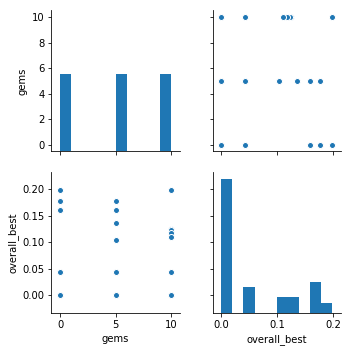

In [27]:
sns.pairplot(df[['gems', 'overall_best']])

## Averages by mutation type

In [33]:
df.groupby(['mutation']).mean()

,gems,n_cols,overall_best,overall_best_mean,overall_best_std,better_gems_total,better_gems_mean,worse_gems_total,worse_gems_mean
mutation,,,,,,,,,
point_mutation,5.0,53.333333,0.044598,7.791577e+23,7.791577e+23,1612.444444,80.622222,575.000000,28.750000
probabilistic_mutation,5.0,53.333333,0.028017,2.362670e+24,2.362670e+24,230.388889,11.519444,1258.555556,62.927778
single_mutation,5.0,53.333333,0.079638,1.516230e+01,1.516230e+01,613.333333,30.666667,1990.555556,99.527778


In [35]:
df[df.gems != 0].groupby(['mutation', 'strategy']).mean()

gems     n_cols  overall_best  \
mutation               strategy                                               
point_mutation         MatchPMStrategy         7.5  53.333333      0.033798   
probabilistic_mutation MatchByActiveStrategy   7.5  53.333333      0.055220   
                       MatchSMStrategy         7.5  53.333333      0.014416   
single_mutation        MatchByActiveStrategy   7.5  53.333333      0.020561   
                       MatchSMStrategy         7.5  53.333333      0.106060   

                                              overall_best_mean  \
mutation               strategy                                   
point_mutation         MatchPMStrategy             1.168737e+24   
probabilistic_mutation MatchByActiveStrategy       1.241397e+02   
                       MatchSMStrategy             4.063126e+01   
single_mutation        MatchByActiveStrategy       3.410125e+01   
                       MatchSMStrategy             1.821533e+00   

                                              overall_best_std  \
mutation               strategy                                  
point_mutation         MatchPMStrategy            1.168737e+24   
probabilistic_mutation MatchByActiveStrategy      1.241397e+02   
                       MatchSMStrategy            4.063126e+01   
single_mutation        MatchByActiveStrategy      3.410125e+01   
                       MatchSMStrategy            1.821533e+00   

                                              better_gems_total  \
mutation               strategy                                   
point_mutation         MatchPMStrategy              2418.666667   
probabilistic_mutation MatchByActiveStrategy         676.166667   
                       MatchSMStrategy                15.000000   
single_mutation        MatchByActiveStrategy        1109.500000   
                       MatchSMStrategy               730.500000   

                                              better_gems_mean  \
mutation               strategy                                  
point_mutation         MatchPMStrategy              120.933333   
probabilistic_mutation MatchByActiveStrategy         33.808333   
                       MatchSMStrategy                0.750000   
single_mutation        MatchByActiveStrategy         55.475000   
                       MatchSMStrategy               36.525000   

                                              worse_gems_total  \
mutation               strategy                                  
point_mutation         MatchPMStrategy              862.500000   
probabilistic_mutation MatchByActiveStrategy       3742.666667   
                       MatchSMStrategy               33.000000   
single_mutation        MatchByActiveStrategy       5523.666667   
                       MatchSMStrategy              448.000000   

                                              worse_gems_mean  
mutation               strategy                                
point_mutation         MatchPMStrategy              43.125000  
probabilistic_mutation MatchByActiveStrategy       187.133333  
                       MatchSMStrategy               1.650000  
single_mutation        MatchByActiveStrategy       276.183333  
                       MatchSMStrategy              22.400000